# Assignment 01: Multi-class Classification 
In this Assignment, you will train a deep model on the CIFAR10 from the scratch using PyTorch.

### Basic Imports

In [1]:
import os
import time
import os.path as osp

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms
import torchvision

import matplotlib.pyplot as plt
from PIL import Image

### Hyperparameters

In [2]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5


### Device

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Dataset


In [4]:
# cifar10 transform
transform_cifar10_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_cifar10_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_set = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform_cifar10_train)
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform_cifar10_test)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Files already downloaded and verified
Files already downloaded and verified


### Model

In [5]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3)  
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 3)  
        self.fc1 = nn.Linear(8 * 6 * 6, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 8 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
model = ConvNet()
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)

### Optimizer

In [7]:
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

### Task 1: per batch training/testing
---

Please denfine two function named ``train_batch`` and ``test_batch``. These functions are essential for training and evaluating machine learning models using batched data from dataloaders.

**To do**: 
1. Define the loss function i.e [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
2. Take the image as the input and generate the output using the pre-defined SimpleNet.
3. Calculate the loss between the output and the corresponding label using the loss function.

In [8]:
##################### Write your answer here ##################
# Define the loss function
mae_loss = nn.L1Loss()
cross_entropy_loss = nn.CrossEntropyLoss()
###############################################################

In [9]:
def mae_train_batch(model, image, target):
    """
    Perform one training batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to train.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated by the defined loss function loss_fn().
    """
    
# print(target.size())
 ##################### Write your answer here ##################
    output = model(image)
# esum=[]
# for value in output:
# esum.append(sum(value))
# print(output.size())
# print(output.size(0))
# print(output.shape[1])
# print(output[0,:])
# for element in esum:
# print(element.item())
# tensor = torch.tensor(esum)
# tensor =tensor.to(device)
    loss = mae_loss(output,target) 
 ###############################################################
   
    return output, loss

In [17]:
def ce_train_batch(model, image, target):
    output = model(image)
    loss = cross_entropy_loss(output,target)
   
    return output, loss 

In [18]:
def focal_train_batch(model, image, target):
    output = model(image)
    loss=focal_loss_half(output,target)
    
    return output, loss

In [19]:
def mae_test_batch(model, image, target):
    """
    Perform one testing batch iteration.

    Args:
        model (torch.nn.Module): The machine learning model to evaluate.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated for the batch.
    """

    ##################### Write your answer here ##################
    output = model(image)
    loss = mae_loss(output,target)
    ###############################################################

    return output, loss

In [27]:
def ce_test_batch(model, image, target):
    output = model(image)
    loss = cross_entropy_loss(output,target)
    
    return output, loss

In [21]:
def focal_test_batch(model, image, target):
    output = model(image)
    loss=focal_loss_half(output,target)
    
    return output,loss

### Model Training

Epoch: 1/30 Train Loss: 0.0009 Acc: 0.0994
Begin test......
Test Loss: 0.0009 Acc: 0.1000
Epoch: 2/30 Train Loss: 0.0009 Acc: 0.0988
Begin test......
Test Loss: 0.0009 Acc: 0.1000
Epoch: 3/30 Train Loss: 0.0009 Acc: 0.1008
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 4/30 Train Loss: 0.0009 Acc: 0.0999
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 5/30 Train Loss: 0.0009 Acc: 0.1017
Begin test......
Test Loss: 0.0009 Acc: 0.1000
Epoch: 6/30 Train Loss: 0.0008 Acc: 0.0983
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 7/30 Train Loss: 0.0008 Acc: 0.0979
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 8/30 Train Loss: 0.0008 Acc: 0.0973
Begin test......
Test Loss: 0.0009 Acc: 0.1000
Epoch: 9/30 Train Loss: 0.0008 Acc: 0.0999
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 10/30 Train Loss: 0.0008 Acc: 0.1002
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 11/30 Train Loss: 0.0008 Acc: 0.1011
Begin test......
Test Loss: 0.0008 Acc: 0.1000
Epoch: 1

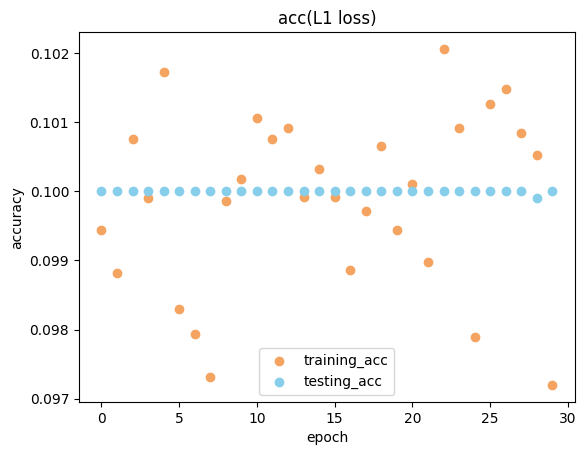

In [37]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)
mae_training_loss = []
mae_training_acc = []
mae_testing_loss = []
mae_testing_acc = []
epochrecord=[]
for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()
     ##########################
     ### Training
     ##########################
    running_cls_loss = 0.0
    running_cls_corrects = 0
    for batch_idx, (image, target) in enumerate(train_dataloader):
        
        image = image.to(device)
        target = target.to(device)
        target_match=F.one_hot(target,num_classes=10)

         # train model
        outputs,loss = mae_train_batch(model, image, target_match)
        _,preds = torch.max(outputs, 1)

        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)
    
    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
    mae_training_loss.append(epoch_loss)
    mae_training_acc.append(epoch_acc.cpu().detach().numpy())
     # change learning rate
    
    scheduler.step()
     
    ########################## Out[17]: In [18]:
     ### Testing
     ##########################
     # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()

        val_loss = 0.0
        val_corrects = 0
        for batch_idx, (image, target) in enumerate(test_dataloader):
            image = image.to(device)
            target = target.to(device)
            target_match=F.one_hot(target,num_classes=10)
            # test model
            outputs, loss = mae_test_batch(model, image, target_match)
            _, preds = torch.max(outputs, 1)

            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)
    
        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)

        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        mae_testing_loss.append(val_loss)
        mae_testing_acc.append(val_acc.cpu().detach().numpy())
            # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:

            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }
            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))

x  = epochrecord
y1 = mae_training_acc
y2= mae_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(L1 loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [22]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5

Epoch: 1/30 Train Loss: 0.0137 Acc: 0.3503
Begin test......
Test Loss: 0.0128 Acc: 0.4063
Epoch: 2/30 Train Loss: 0.0128 Acc: 0.3950
Begin test......
Test Loss: 0.0127 Acc: 0.4178
Epoch: 3/30 Train Loss: 0.0125 Acc: 0.4108
Begin test......
Test Loss: 0.0116 Acc: 0.4570
Epoch: 4/30 Train Loss: 0.0124 Acc: 0.4251
Begin test......
Test Loss: 0.0118 Acc: 0.4559
Epoch: 5/30 Train Loss: 0.0123 Acc: 0.4273
Begin test......
Test Loss: 0.0116 Acc: 0.4730
Epoch: 6/30 Train Loss: 0.0122 Acc: 0.4357
Begin test......
Test Loss: 0.0118 Acc: 0.4608
Epoch: 7/30 Train Loss: 0.0115 Acc: 0.4700
Begin test......
Test Loss: 0.0108 Acc: 0.5124
Epoch: 8/30 Train Loss: 0.0114 Acc: 0.4768
Begin test......
Test Loss: 0.0107 Acc: 0.5201
Epoch: 9/30 Train Loss: 0.0113 Acc: 0.4780
Begin test......
Test Loss: 0.0107 Acc: 0.5158
Epoch: 10/30 Train Loss: 0.0113 Acc: 0.4801
Begin test......
Test Loss: 0.0106 Acc: 0.5222
Epoch: 11/30 Train Loss: 0.0112 Acc: 0.4856
Begin test......
Test Loss: 0.0105 Acc: 0.5261
Epoch: 1

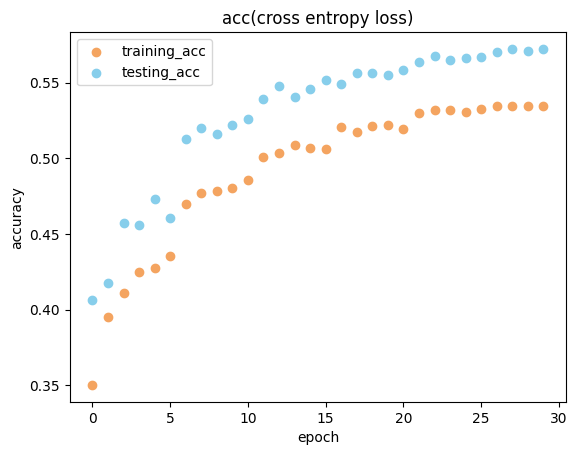

In [24]:
ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
            x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Epoch: 1/30 Train Loss: 0.0123 Acc: 0.3689
Begin test......
Test Loss: 0.0117 Acc: 0.3927
Epoch: 2/30 Train Loss: 0.0123 Acc: 0.3696
Begin test......
Test Loss: 0.0115 Acc: 0.4122
Epoch: 3/30 Train Loss: 0.0123 Acc: 0.3709
Begin test......
Test Loss: 0.0114 Acc: 0.4098
Epoch: 4/30 Train Loss: 0.0122 Acc: 0.3724
Begin test......
Test Loss: 0.0116 Acc: 0.4137
Epoch: 5/30 Train Loss: 0.0122 Acc: 0.3748
Begin test......
Test Loss: 0.0120 Acc: 0.3926
Epoch: 6/30 Train Loss: 0.0112 Acc: 0.4173
Begin test......
Test Loss: 0.0105 Acc: 0.4580
Epoch: 7/30 Train Loss: 0.0111 Acc: 0.4267
Begin test......
Test Loss: 0.0107 Acc: 0.4550
Epoch: 8/30 Train Loss: 0.0111 Acc: 0.4304
Begin test......
Test Loss: 0.0102 Acc: 0.4709
Epoch: 9/30 Train Loss: 0.0110 Acc: 0.4324
Begin test......
Test Loss: 0.0101 Acc: 0.4778
Epoch: 10/30 Train Loss: 0.0109 Acc: 0.4333
Begin test......
Test Loss: 0.0104 Acc: 0.4649
Epoch: 11/30 Train Loss: 0.0104 Acc: 0.4568
Begin test......
Test Loss: 0.0096 Acc: 0.4886
Epoch: 1

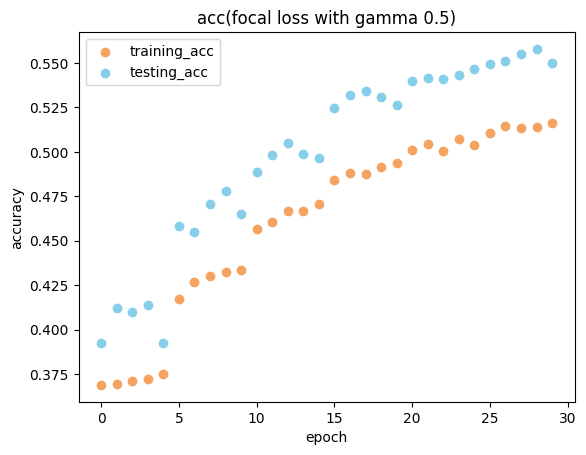

In [31]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
# lr=LEARNING_RATE  stepsize
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

focalhalf_training_loss = []
focalhalf_training_acc = []
focalhalf_testing_loss = []
focalhalf_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()
     ##########################
     ### Training
     ##########################
    running_cls_loss = 0.0
    running_cls_corrects = 0
    for batch_idx, (image, target) in enumerate(train_dataloader):
        
        image = image.to(device)
        target = target.to(device)
        # print(image.size())
         # train model
        # p = F.softmax(image)
        # target=F.softmax(target,dim=1)

        # pt = p * target + (1 - p) * (1 - target)
        # outputs, ce_loss = ce_train_batch(model, image, target)
        # pt = torch.exp(-ce_loss)
        # loss = ((1 - pt)**0.5)* ce_loss
        # outputs, loss = focal_train_batch(model, image, target)
        outputs, ce_loss = ce_train_batch(model, image, target)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt)**0.5)* ce_loss
        # p_t = p * target + (1 - p) * (1 - target)
        # loss = loss * ((1 - p_t) ** 0.5) 
        # gamma=0.5
        _,preds = torch.max(outputs, 1)

        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)
    
    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
    focalhalf_training_loss.append(epoch_loss)
    focalhalf_training_acc.append(epoch_acc.cpu().detach().numpy())
     # change learning rate
    
    scheduler.step()
     
    ########################## Out[17]: In [18]:
     ### Testing
     ##########################
     # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()

        val_loss = 0.0
        val_corrects = 0
        for batch_idx, (image, target) in enumerate(test_dataloader):
            image = image.to(device)
            target = target.to(device)


             # test model
            outputs, ce_loss = ce_test_batch(model, image, target)
            pt = torch.exp(-ce_loss)
            loss = ((1 - pt)**0.5)* ce_loss
            _, preds = torch.max(outputs, 1)


            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)
            
        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)

        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        focalhalf_testing_loss.append(val_loss)
        focalhalf_testing_acc.append(val_acc.cpu().detach().numpy())
            # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:

            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }
            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
        
x   = epochrecord
y1 = focalhalf_training_acc
y2= focalhalf_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(focal loss with gamma 0.5)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Epoch: 1/30 Train Loss: 0.0111 Acc: 0.2769
Begin test......
Test Loss: 0.0100 Acc: 0.3330
Epoch: 2/30 Train Loss: 0.0101 Acc: 0.3207
Begin test......
Test Loss: 0.0090 Acc: 0.3690
Epoch: 3/30 Train Loss: 0.0097 Acc: 0.3436
Begin test......
Test Loss: 0.0087 Acc: 0.3883
Epoch: 4/30 Train Loss: 0.0098 Acc: 0.3372
Begin test......
Test Loss: 0.0092 Acc: 0.3492
Epoch: 5/30 Train Loss: 0.0095 Acc: 0.3501
Begin test......
Test Loss: 0.0087 Acc: 0.3790
Epoch: 6/30 Train Loss: 0.0085 Acc: 0.3902
Begin test......
Test Loss: 0.0075 Acc: 0.4421
Epoch: 7/30 Train Loss: 0.0082 Acc: 0.4021
Begin test......
Test Loss: 0.0073 Acc: 0.4476
Epoch: 8/30 Train Loss: 0.0081 Acc: 0.4078
Begin test......
Test Loss: 0.0072 Acc: 0.4572
Epoch: 9/30 Train Loss: 0.0080 Acc: 0.4113
Begin test......
Test Loss: 0.0071 Acc: 0.4571
Epoch: 10/30 Train Loss: 0.0079 Acc: 0.4171
Begin test......
Test Loss: 0.0069 Acc: 0.4728
Epoch: 11/30 Train Loss: 0.0073 Acc: 0.4411
Begin test......
Test Loss: 0.0065 Acc: 0.4874
Epoch: 1

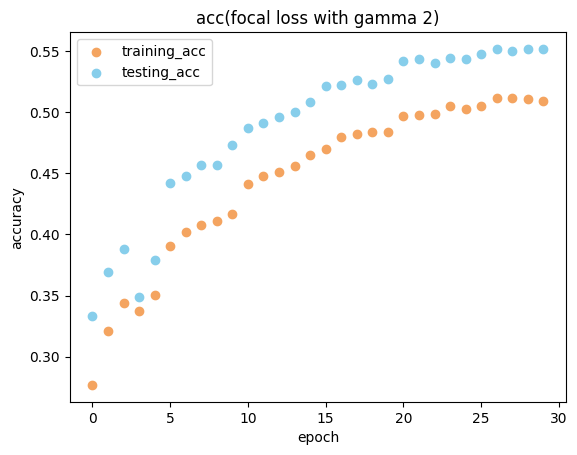

In [35]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
# lr=LEARNING_RATE  stepsize
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

focaltwo_training_loss = []
focaltwo_training_acc = []
focaltwo_testing_loss = []
focaltwo_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()
     ##########################
     ### Training
     ##########################
    running_cls_loss = 0.0
    running_cls_corrects = 0
    for batch_idx, (image, target) in enumerate(train_dataloader):
        
        image = image.to(device)
        target = target.to(device)
        # print(image.size())
         # train model
        # p = F.softmax(image)
        # target=F.softmax(target,dim=1)

        # pt = p * target + (1 - p) * (1 - target)
        # outputs, ce_loss = ce_train_batch(model, image, target)
        # pt = torch.exp(-ce_loss)
        # loss = ((1 - pt)**0.5)* ce_loss
        # outputs, loss = focal_train_batch(model, image, target)
        outputs, ce_loss = ce_train_batch(model, image, target)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt)**2)* ce_loss
        # p_t = p * target + (1 - p) * (1 - target)
        # loss = loss * ((1 - p_t) ** 0.5) 
        # gamma=0.5
        _,preds = torch.max(outputs, 1)

        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)
    
    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
    focaltwo_training_loss.append(epoch_loss)
    focaltwo_training_acc.append(epoch_acc.cpu().detach().numpy())
     # change learning rate
    
    scheduler.step()
     
    ########################## Out[17]: In [18]:
     ### Testing
     ##########################
     # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()

        val_loss = 0.0
        val_corrects = 0
        for batch_idx, (image, target) in enumerate(test_dataloader):
            image = image.to(device)
            target = target.to(device)


             # test model
            outputs, ce_loss = ce_test_batch(model, image, target)
            pt = torch.exp(-ce_loss)
            loss = ((1 - pt)**2)* ce_loss
            _, preds = torch.max(outputs, 1)


            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)
            
        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)

        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        focaltwo_testing_loss.append(val_loss)
        focaltwo_testing_acc.append(val_acc.cpu().detach().numpy())
            # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:

            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }
            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
        
x   = epochrecord
y1 = focaltwo_training_acc
y2= focaltwo_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(focal loss with gamma 2)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [ ]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-2
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)
mae_training_loss = []
mae_training_acc = []
mae_testing_loss = []
mae_testing_acc = []
epochrecord=[]
for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()
     ##########################
     ### Training
     ##########################
    running_cls_loss = 0.0
    running_cls_corrects = 0
    for batch_idx, (image, target) in enumerate(train_dataloader):
        
        image = image.to(device)
        target = target.to(device)
        target_match=F.one_hot(target,num_classes=10)

         # train model
        outputs,loss = mae_train_batch(model, image, target_match)
        _,preds = torch.max(outputs, 1)

        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
     
    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)
    
    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    
    mae_training_loss.append(epoch_loss)
    mae_training_acc.append(epoch_acc.cpu().detach().numpy())
     # change learning rate
    
    scheduler.step()
     
    ########################## Out[17]: In [18]:
     ### Testing
     ##########################
     # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()

        val_loss = 0.0
        val_corrects = 0
        for batch_idx, (image, target) in enumerate(test_dataloader):
            image = image.to(device)
            target = target.to(device)
            target_match=F.one_hot(target,num_classes=10)
            # test model
            outputs, loss = mae_test_batch(model, image, target_match)
            _, preds = torch.max(outputs, 1)

            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)
    
        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)

        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        mae_testing_loss.append(val_loss)
        mae_testing_acc.append(val_acc.cpu().detach().numpy())
            # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:

            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }
            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))

x  = epochrecord
y1 = mae_training_acc
y2= mae_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(L1 loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Epoch: 1/30 Train Loss: 0.0149 Acc: 0.2973
Begin test......
Test Loss: 0.0126 Acc: 0.4206
Epoch: 2/30 Train Loss: 0.0128 Acc: 0.4008
Begin test......
Test Loss: 0.0117 Acc: 0.4572
Epoch: 3/30 Train Loss: 0.0121 Acc: 0.4364
Begin test......
Test Loss: 0.0112 Acc: 0.4809
Epoch: 4/30 Train Loss: 0.0117 Acc: 0.4583
Begin test......
Test Loss: 0.0108 Acc: 0.5085
Epoch: 5/30 Train Loss: 0.0114 Acc: 0.4740
Begin test......
Test Loss: 0.0105 Acc: 0.5267
Epoch: 6/30 Train Loss: 0.0109 Acc: 0.5028
Begin test......
Test Loss: 0.0103 Acc: 0.5263
Epoch: 7/30 Train Loss: 0.0108 Acc: 0.5058
Begin test......
Test Loss: 0.0099 Acc: 0.5562
Epoch: 8/30 Train Loss: 0.0106 Acc: 0.5158
Begin test......
Test Loss: 0.0099 Acc: 0.5548
Epoch: 9/30 Train Loss: 0.0106 Acc: 0.5161
Begin test......
Test Loss: 0.0097 Acc: 0.5650
Epoch: 10/30 Train Loss: 0.0105 Acc: 0.5198
Begin test......
Test Loss: 0.0096 Acc: 0.5637
Epoch: 11/30 Train Loss: 0.0103 Acc: 0.5330
Begin test......
Test Loss: 0.0095 Acc: 0.5761
Epoch: 1

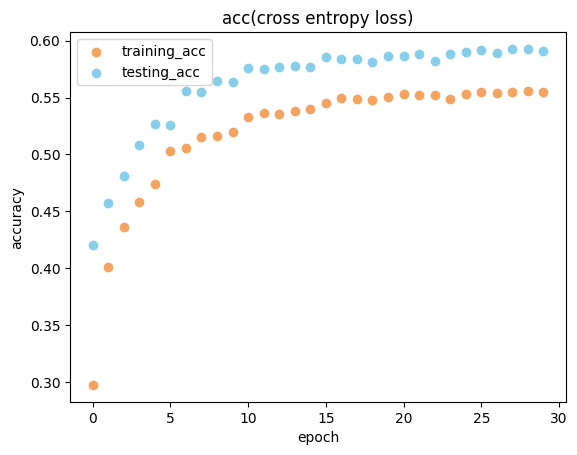

In [39]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-2
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
            x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Epoch: 1/30 Train Loss: 0.0178 Acc: 0.1430
Begin test......
Test Loss: 0.0173 Acc: 0.2088
Epoch: 2/30 Train Loss: 0.0164 Acc: 0.2412
Begin test......
Test Loss: 0.0155 Acc: 0.2892
Epoch: 3/30 Train Loss: 0.0153 Acc: 0.2893
Begin test......
Test Loss: 0.0146 Acc: 0.3362
Epoch: 4/30 Train Loss: 0.0146 Acc: 0.3211
Begin test......
Test Loss: 0.0138 Acc: 0.3690
Epoch: 5/30 Train Loss: 0.0140 Acc: 0.3442
Begin test......
Test Loss: 0.0132 Acc: 0.3962
Epoch: 6/30 Train Loss: 0.0136 Acc: 0.3609
Begin test......
Test Loss: 0.0130 Acc: 0.4076
Epoch: 7/30 Train Loss: 0.0134 Acc: 0.3712
Begin test......
Test Loss: 0.0128 Acc: 0.4122
Epoch: 8/30 Train Loss: 0.0133 Acc: 0.3759
Begin test......
Test Loss: 0.0126 Acc: 0.4245
Epoch: 9/30 Train Loss: 0.0131 Acc: 0.3828
Begin test......
Test Loss: 0.0125 Acc: 0.4266
Epoch: 10/30 Train Loss: 0.0130 Acc: 0.3884
Begin test......
Test Loss: 0.0124 Acc: 0.4331
Epoch: 11/30 Train Loss: 0.0129 Acc: 0.3928
Begin test......
Test Loss: 0.0123 Acc: 0.4398
Epoch: 1

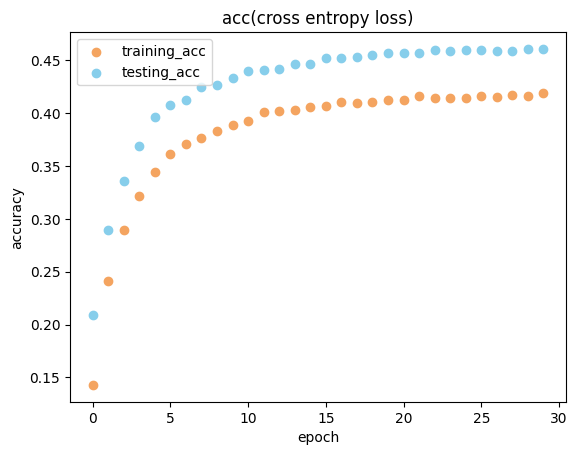

In [40]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-3
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
            x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Epoch: 1/50 Train Loss: 0.0177 Acc: 0.1524
Begin test......
Test Loss: 0.0170 Acc: 0.2306
Epoch: 2/50 Train Loss: 0.0162 Acc: 0.2501
Begin test......
Test Loss: 0.0155 Acc: 0.2983
Epoch: 3/50 Train Loss: 0.0153 Acc: 0.2930
Begin test......
Test Loss: 0.0147 Acc: 0.3284
Epoch: 4/50 Train Loss: 0.0147 Acc: 0.3223
Begin test......
Test Loss: 0.0140 Acc: 0.3711
Epoch: 5/50 Train Loss: 0.0141 Acc: 0.3401
Begin test......
Test Loss: 0.0133 Acc: 0.3933
Epoch: 6/50 Train Loss: 0.0137 Acc: 0.3575
Begin test......
Test Loss: 0.0131 Acc: 0.3989
Epoch: 7/50 Train Loss: 0.0136 Acc: 0.3657
Begin test......
Test Loss: 0.0129 Acc: 0.4058
Epoch: 8/50 Train Loss: 0.0134 Acc: 0.3725
Begin test......
Test Loss: 0.0127 Acc: 0.4176
Epoch: 9/50 Train Loss: 0.0133 Acc: 0.3804
Begin test......
Test Loss: 0.0127 Acc: 0.4148
Epoch: 10/50 Train Loss: 0.0132 Acc: 0.3836
Begin test......
Test Loss: 0.0125 Acc: 0.4283
Epoch: 11/50 Train Loss: 0.0131 Acc: 0.3910
Begin test......
Test Loss: 0.0125 Acc: 0.4261
Epoch: 1

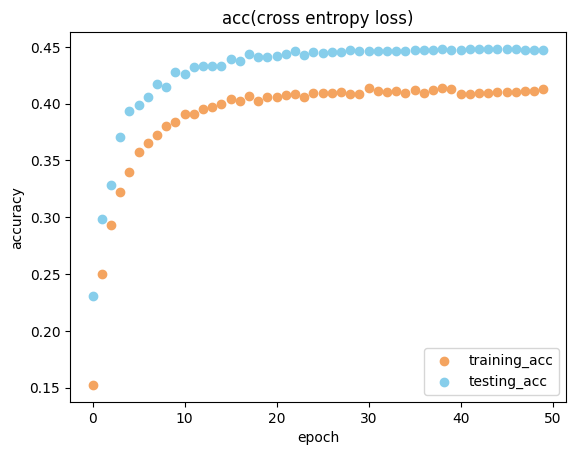

In [41]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 50
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-3
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
            x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [43]:
# 3x3 卷积定义
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                     stride=stride, padding=1, bias=False)
# Resnet 的残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
 
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out
# ResNet定义
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
 
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
 
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [44]:
def ce_train_batch(model, image, target):
    output = model(image)
    loss= cross_entropy_loss(output,target)
    return output, loss
def ce_test_batch(model, image, target):
    output = model(image)
    loss= cross_entropy_loss(output,target)
    return output, loss

Epoch: 1/30 Train Loss: 0.0125 Acc: 0.4001
Begin test......
Test Loss: 0.0145 Acc: 0.4082
Epoch: 2/30 Train Loss: 0.0086 Acc: 0.6032
Begin test......
Test Loss: 0.0081 Acc: 0.6387
Epoch: 3/30 Train Loss: 0.0069 Acc: 0.6843
Begin test......
Test Loss: 0.0072 Acc: 0.6893
Epoch: 4/30 Train Loss: 0.0059 Acc: 0.7356
Begin test......
Test Loss: 0.0065 Acc: 0.7286
Epoch: 5/30 Train Loss: 0.0051 Acc: 0.7700
Begin test......
Test Loss: 0.0060 Acc: 0.7451
Epoch: 6/30 Train Loss: 0.0042 Acc: 0.8113
Begin test......
Test Loss: 0.0049 Acc: 0.7921
Epoch: 7/30 Train Loss: 0.0040 Acc: 0.8252
Begin test......
Test Loss: 0.0044 Acc: 0.8108
Epoch: 8/30 Train Loss: 0.0038 Acc: 0.8305
Begin test......
Test Loss: 0.0047 Acc: 0.8039
Epoch: 9/30 Train Loss: 0.0036 Acc: 0.8400
Begin test......
Test Loss: 0.0043 Acc: 0.8183
Epoch: 10/30 Train Loss: 0.0035 Acc: 0.8470
Begin test......
Test Loss: 0.0041 Acc: 0.8239
Epoch: 11/30 Train Loss: 0.0030 Acc: 0.8660
Begin test......
Test Loss: 0.0037 Acc: 0.8432
Epoch: 1

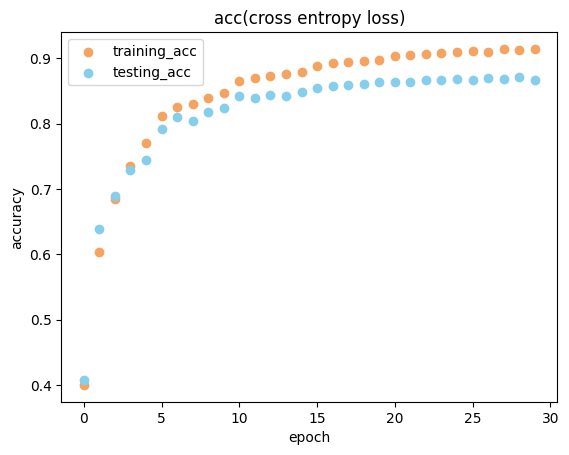

In [45]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
            x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Epoch: 1/30 Train Loss: 0.0157 Acc: 0.2517
Begin test......
Test Loss: 0.0139 Acc: 0.3399
Epoch: 2/30 Train Loss: 0.0143 Acc: 0.3228
Begin test......
Test Loss: 0.0143 Acc: 0.3356
Epoch: 3/30 Train Loss: 0.0139 Acc: 0.3421
Begin test......
Test Loss: 0.0135 Acc: 0.3749
Epoch: 4/30 Train Loss: 0.0139 Acc: 0.3441
Begin test......
Test Loss: 0.0135 Acc: 0.3856
Epoch: 5/30 Train Loss: 0.0137 Acc: 0.3557
Begin test......
Test Loss: 0.0140 Acc: 0.3641
Epoch: 6/30 Train Loss: 0.0130 Acc: 0.3872
Begin test......
Test Loss: 0.0126 Acc: 0.4276
Epoch: 7/30 Train Loss: 0.0126 Acc: 0.4049
Begin test......
Test Loss: 0.0118 Acc: 0.4498
Epoch: 8/30 Train Loss: 0.0124 Acc: 0.4210
Begin test......
Test Loss: 0.0116 Acc: 0.4681
Epoch: 9/30 Train Loss: 0.0123 Acc: 0.4322
Begin test......
Test Loss: 0.0116 Acc: 0.4751
Epoch: 10/30 Train Loss: 0.0122 Acc: 0.4347
Begin test......
Test Loss: 0.0113 Acc: 0.4862
Epoch: 11/30 Train Loss: 0.0116 Acc: 0.4621
Begin test......
Test Loss: 0.0110 Acc: 0.4967
Epoch: 1

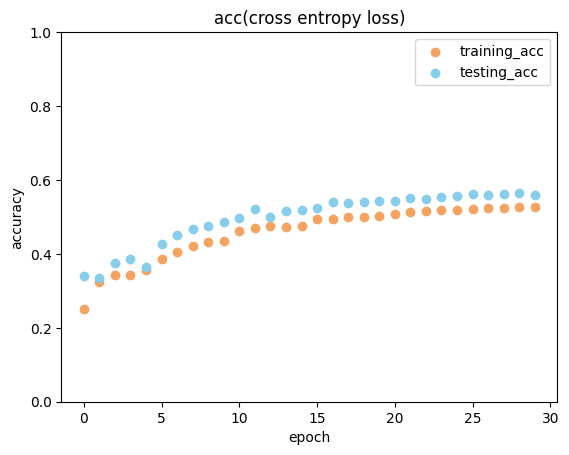

In [49]:
# random seed
SEED = 1 
NUM_CLASS = 10

# Training
BATCH_SIZE = 128
NUM_EPOCHS = 30
EVAL_INTERVAL=1
SAVE_DIR = './log'

# Optimizer
LEARNING_RATE = 1e-1
MOMENTUM = 0.9
STEP=5
GAMMA=0.5
model = ConvNet()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP, gamma=GAMMA)

ce_training_loss = []
ce_training_acc = []
ce_testing_loss = []
ce_testing_acc = []
epochrecord=[]

for epoch in range(NUM_EPOCHS):
    epochrecord.append(epoch)
    model.train()
    torch.cuda.empty_cache()

    ##########################
    ### Training
    ##########################

    running_cls_loss = 0.0
    running_cls_corrects = 0

    for batch_idx, (image, target) in enumerate(train_dataloader):

        image = image.to(device)
        target = target.to(device)

        # train model
        outputs, loss = ce_train_batch(model, image, target)
        _, preds = torch.max(outputs, 1)

        
        loss_data = loss.data.item()
        if np.isnan(loss_data):
            raise ValueError('loss is nan while training')
        running_cls_loss += loss.item()
        running_cls_corrects += torch.sum(preds == target.data)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss = running_cls_loss / len(train_set)
    epoch_acc = running_cls_corrects.double() / len(train_set)

    print(f'Epoch: {epoch+1}/{NUM_EPOCHS} Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    ce_training_loss.append(epoch_loss)
    ce_training_acc.append(epoch_acc.cpu().detach().numpy())

    # change learning rate
    scheduler.step()


    ##########################
    ### Testing
    ##########################
    # # eval model during training or in the last epoch
    if (epoch + 1) % EVAL_INTERVAL == 0 or (epoch +1) == NUM_EPOCHS:
        print('Begin test......')
        model.eval()
    
        val_loss = 0.0
        val_corrects = 0

        for batch_idx, (image, target) in enumerate(test_dataloader):

            image = image.to(device)
            target = target.to(device)

            # test model
            outputs, loss = ce_test_batch(model, image, target)
            _, preds = torch.max(outputs, 1)
            
            val_loss += loss.item()
            val_corrects += torch.sum(preds == target.data)

        val_loss = val_loss / len(test_set)
        val_acc = val_corrects.double() / len(test_set)
        print(f'Test Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        ce_testing_loss.append(val_loss)
        ce_testing_acc.append(val_acc.cpu().detach().numpy())

        # save the model in last epoch
        if (epoch +1) == NUM_EPOCHS:
            
            state = {
            'state_dict': model.state_dict(),
            'acc': epoch_acc,
            'epoch': (epoch+1),
            }

            # check the dir
            if not os.path.exists(SAVE_DIR):
                os.makedirs(SAVE_DIR)

            # save the state
            torch.save(state, osp.join(SAVE_DIR, 'checkpoint_%s.pth' % (str(epoch+1))))
            
x  = epochrecord
y1 = ce_training_acc
y2= ce_testing_acc
plt.scatter(x, y1,label="training_acc",color="#F4A460")
plt.scatter(x, y2,label="testing_acc",color="#87CEEB")
plt.title('acc(cross entropy loss)')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()